In [245]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ages.csv", index_col=0).mul(100).round(2)

In [246]:
df = pd.melt(df.reset_index(), id_vars=[
             "Ages"], var_name="Location", value_vars=df.columns, value_name="values")
df.head()

,Ages,Location,values
0,Ages 0-14,Denman,9.06
1,Ages 15-64,Denman,51.09
2,Ages 65+,Denman,39.86
3,Ages 0-14,Hornby,8.98
4,Ages 15-64,Hornby,47.35


Ages         object
Location     object
values      float64
dtype: object


AttributeError: 'NoneType' object has no attribute 'remove'

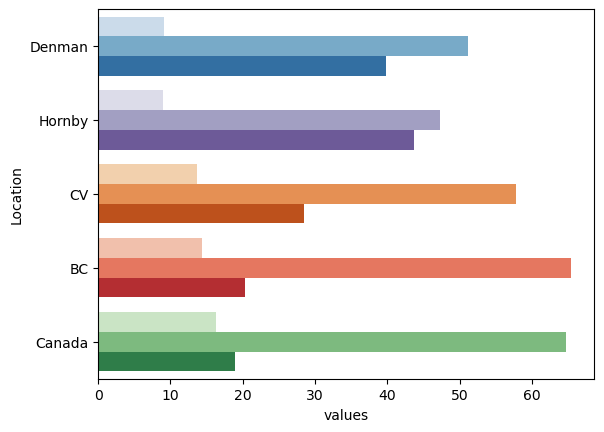

In [305]:
denman_df = df.loc[df["Location"] == "Denman"]
hornby_df = df.loc[df["Location"] == "Hornby"]
cv_df = df.loc[df["Location"] == "CV"]
bc_df = df.loc[df["Location"] == "BC"]
canada_df = df.loc[df["Location"] == "Canada"]

print(denman_df.dtypes)
palette = {'Denman':  sns.color_palette("Blues", denman_df.shape[0]),
           'Hornby':  sns.color_palette("Purples", hornby_df.shape[0]),
           'CV':  sns.color_palette("Oranges", cv_df.shape[0]),
           'BC':  sns.color_palette("Reds", bc_df.shape[0]),
           'Canada': sns.color_palette("Greens", canada_df.shape[0]),
           }

denman = denman_df["Location"].iloc[0]
hornby = hornby_df["Location"].iloc[0]
cv = cv_df["Location"].iloc[0]
bc = bc_df["Location"].iloc[0]
canada = canada_df["Location"].iloc[0]

plt1 = sns.barplot(data=denman_df, x="values", y=df["Location"], orient="h",
                   hue="Ages", palette=palette[denman])
plt2 = sns.barplot(data=hornby_df, x="values", y=df["Location"], orient="h",
                   hue="Ages", palette=palette[hornby])
plt3 = sns.barplot(data=cv_df, x="values", y=df["Location"], orient="h",
                   hue="Ages", palette=palette[cv])
plt4 = sns.barplot(data=bc_df, x="values", y=df["Location"], orient="h",
                   hue="Ages", palette=palette[bc])
plt5 = sns.barplot(data=canada_df, x="values", y=df["Location"], orient="h",
                   hue="Ages", palette=palette[canada])

plots = [plt1, plt2, plt3, plt4, plt5]

for plot in plots:
    plot.legend_.remove()

"""for plot in plots:
    for section in plot.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels = [value.get_height() if value.get_height()
                  else '' for value in section]

        # remove the labels parameter if it's not needed for customized labels
        plot.bar_label(section, fmt='%0.2f%%',
                       label_type='center', fontsize=16)

plt.legend = False """